In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv("India_new_car_sales_by_make.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


   Year  Month        Make  Quantity   Pct
0  2015      1      Toyota      2884  22.7
1  2015      1  Volkswagen      2521  19.9
2  2015      1    Mahindra      1029   8.1
3  2015      1        Ford       870   6.9
4  2015      1       Volvo       693   5.5
Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64
              Year        Month     Quantity          Pct
count  4377.000000  4377.000000  4377.000000  4377.000000
mean   2019.421065     6.459904   307.802376     2.762257
std       2.906408     3.446815   411.315972     3.635185
min    2015.000000     1.000000     1.000000     0.000000
25%    2017.000000     3.000000    14.000000     0.100000
50%    2019.000000     6.000000   153.000000     1.400000
75%    2022.000000     9.000000   461.000000     4.200000
max    2025.000000    12.000000  3017.000000    22.700000


In [3]:
data

,Year,Month,Make,Quantity,Pct
0,2015,1,Toyota,2884,22.7
1,2015,1,Volkswagen,2521,19.9
2,2015,1,Mahindra,1029,8.1
3,2015,1,Ford,870,6.9
4,2015,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2025,1,Force Motors,3,0.0
4373,2025,1,Maserati,2,0.0
4374,2025,1,Ferrari,1,0.0
4375,2025,1,Smart,1,0.0


In [4]:
# One-Hot Encode the 'Make' column
encoder = OneHotEncoder()
encoded_makes = encoder.fit_transform(data[['Make']]).toarray()

# Convert to DataFrame and concatenate with the original data
encoded_columns = pd.DataFrame(encoded_makes, columns=encoder.get_feature_names_out(['Make']))
data_encoded = pd.concat([data, encoded_columns], axis=1).drop('Make', axis=1)

# Display the updated DataFrame
data_encoded.head()


,Year,Month,Quantity,Pct,Make_Ashok LeyLand,Make_Aston Martin,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,...,Make_Ssangyong,Make_Suzuki,Make_Tata,Make_Tazzari,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_Westfield,Make_nan
0,2015,1,2884,22.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2015,1,2521,19.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2015,1,1029,8.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,870,6.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,693,5.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Features: All columns except 'Pct'
X = data_encoded.drop(columns=['Pct'])

# Target variable: 'Pct'
y = data_encoded['Pct']

# Display the first few rows of the feature matrix
print(X.head())


   Year  Month  Quantity  Make_Ashok LeyLand  Make_Aston Martin  Make_Audi  \
0  2015      1      2884                 0.0                0.0        0.0   
1  2015      1      2521                 0.0                0.0        0.0   
2  2015      1      1029                 0.0                0.0        0.0   
3  2015      1       870                 0.0                0.0        0.0   
4  2015      1       693                 0.0                0.0        0.0   

   Make_BMW  Make_BYD  Make_Bentley  Make_BharatBenz  ...  Make_Ssangyong  \
0       0.0       0.0           0.0              0.0  ...             0.0   
1       0.0       0.0           0.0              0.0  ...             0.0   
2       0.0       0.0           0.0              0.0  ...             0.0   
3       0.0       0.0           0.0              0.0  ...             0.0   
4       0.0       0.0           0.0              0.0  ...             0.0   

   Make_Suzuki  Make_Tata  Make_Tazzari  Make_Tesla  Make_Toyota  \


In [6]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the feature matrix
X_scaled = scaler.fit_transform(X)

# Convert scaled data to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled feature matrix
print(X_scaled_df.head())


       Year     Month  Quantity  Make_Ashok LeyLand  Make_Aston Martin  \
0 -1.521318 -1.584224  6.264021           -0.168613          -0.078784   
1 -1.521318 -1.584224  5.381387           -0.168613          -0.078784   
2 -1.521318 -1.584224  1.753591           -0.168613          -0.078784   
3 -1.521318 -1.584224  1.366983           -0.168613          -0.078784   
4 -1.521318 -1.584224  0.936608           -0.168613          -0.078784   

   Make_Audi  Make_BMW  Make_BYD  Make_Bentley  Make_BharatBenz  ...  \
0  -0.168613 -0.168613 -0.126557     -0.054579        -0.165725  ...   
1  -0.168613 -0.168613 -0.126557     -0.054579        -0.165725  ...   
2  -0.168613 -0.168613 -0.126557     -0.054579        -0.165725  ...   
3  -0.168613 -0.168613 -0.126557     -0.054579        -0.165725  ...   
4  -0.168613 -0.168613 -0.126557     -0.054579        -0.165725  ...   

   Make_Ssangyong  Make_Suzuki  Make_Tata  Make_Tazzari  Make_Tesla  \
0       -0.136446    -0.168613  -0.169329     -0.02

In [7]:
# Split the data (80% training, 20% testing)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)



In [8]:
# Initialize the Random Forest Regressor
model_pct = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model_pct.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Predict 'Pct' on the test set
y_pred = model_pct.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.15
R-squared: 0.99


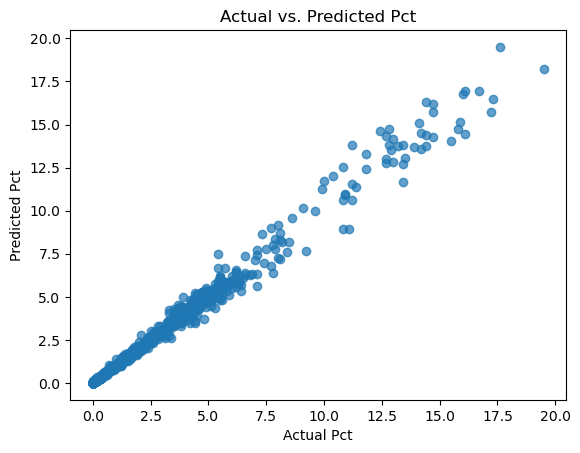

In [10]:
# Scatter plot of actual vs predicted percentage
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Pct")
plt.ylabel("Predicted Pct")
plt.title("Actual vs. Predicted Pct")
plt.show()


In [18]:
# Sample future data
future_data = pd.DataFrame({
    'Year': [2025],
    'Month': [2],
    'Quantity': [3000],  # Example quantity
    'Make': ['Toyota']
})

# Encode 'Make' column
encoded_future = encoder.transform(future_data[['Make']]).toarray()
encoded_future_df = pd.DataFrame(encoded_future, columns=encoder.get_feature_names_out(['Make']))

# Combine with other features
future_encoded = pd.concat([future_data.drop('Make', axis=1), encoded_future_df], axis=1)

# Predict future percentage
future_pct_prediction = model_pct.predict(future_encoded)
print(f"Predicted Pct: {future_pct_prediction[0]:.2f}%")


Predicted Pct: 21.18%
